# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [1]:
# Import essential libraries

import os
import cv2
import numpy as np
from tqdm import tqdm

Load the dataset.

In [2]:
# Load and unzip the dataset
!unzip data.zip



Streaming output truncated to the last 5000 lines.
  inflating: data/Glass/file_96.png  
  inflating: data/Paper/file_560.png  
  inflating: data/Glass/file_620.png  
  inflating: data/Glass/file_676.png  
  inflating: data/Glass/file_177.png  
  inflating: data/Glass/file_749.png  
  inflating: data/Glass/file_460.png  
  inflating: data/Glass/file_127.png  
  inflating: data/Glass/file_438.png  
  inflating: data/Glass/file_132.png  
  inflating: data/Glass/file_98.png  
  inflating: data/Glass/file_427.png  
  inflating: data/Glass/file_351.png  
  inflating: data/Glass/file_74.png  
  inflating: data/Glass/file_377.png  
  inflating: data/Glass/file_445.png  
  inflating: data/Glass/file_229.png  
  inflating: data/Glass/file_658.png  
  inflating: data/Glass/file_627.png  
  inflating: data/Glass/file_53.png  
  inflating: data/Glass/file_420.png  
  inflating: data/Glass/file_740.png  
  inflating: data/Glass/file_458.png  
  inflating: data/Glass/file_519.png  
  inflating: data

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [3]:
import os

data_dir = "data"

classes = os.listdir(data_dir)
print(f"Classes found: {classes}")
for cls in classes:
    print(f"{cls} → {len(os.listdir(os.path.join(data_dir, cls)))} images")




Classes found: ['Metal', 'Plastic', 'Cardboard', 'Other', 'Glass', 'Food_Waste', 'Paper']
Metal → 1000 images
Plastic → 2295 images
Cardboard → 540 images
Other → 1010 images
Glass → 750 images
Food_Waste → 1000 images
Paper → 1030 images


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [4]:
# Get the images and their labels
import cv2
import numpy as np
from tqdm import tqdm

def load_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for label, cls in enumerate(class_names):
        cls_folder = os.path.join(data_dir, cls)
        for img_file in tqdm(os.listdir(cls_folder), desc=f"Loading {cls}"):
            img_path = os.path.join(cls_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(cls)
    return np.array(images), np.array(labels)

images, labels = load_images(data_dir)
print(f"Loaded {len(images)} images.")





Loading Plastic: 100%|██████████| 2295/2295 [00:03<00:00, 574.88it/s]


Loaded 7625 images.


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

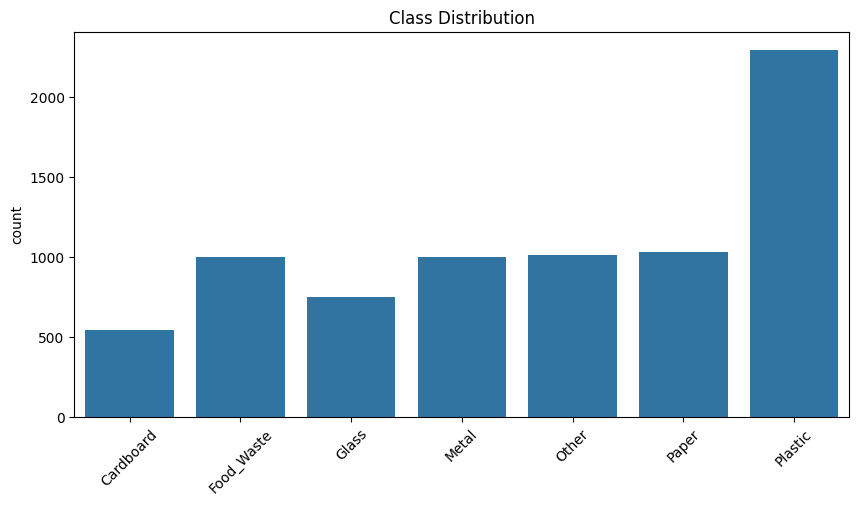

In [5]:
# Visualise Data Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=labels)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

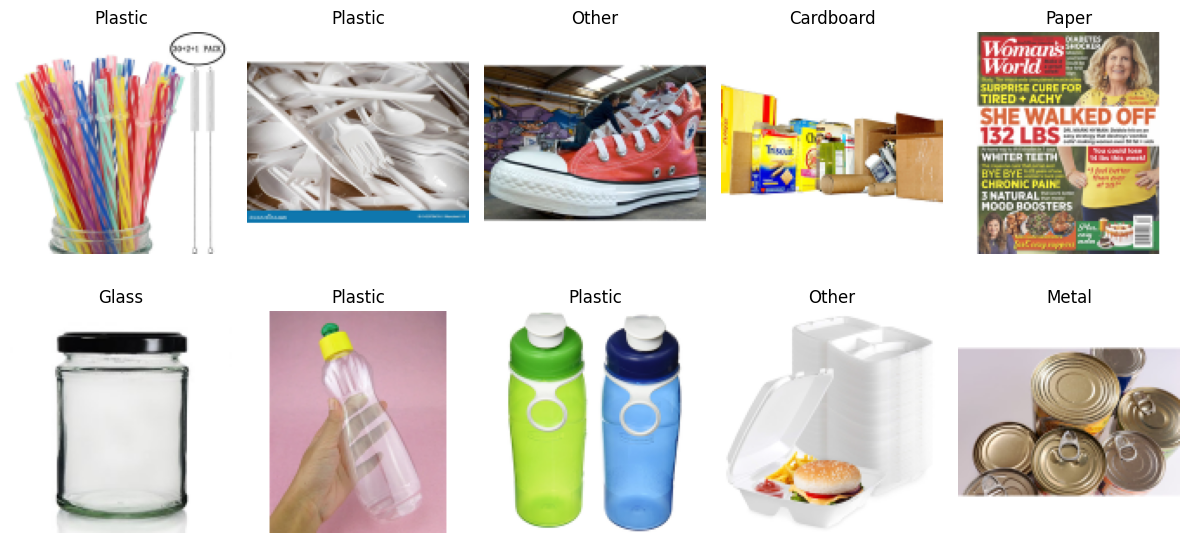

In [6]:
# Visualise Sample Images (across different labels)

import random

plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(images) - 1)
    plt.subplot(2, 5, i+1)
    plt.imshow(images[idx])
    plt.title(labels[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()




#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [9]:
# Find the smallest and largest image dimensions from the data set
heights = [img.shape[0] for img in images]
widths = [img.shape[1] for img in images]
min_size = (min(heights), min(widths))
print(f"Minimum image size found: {min_size}")
max_size = (max(heights), max(widths))
print(f"Maximum image size found: {max_size}")



Minimum image size found: (128, 128)
Maximum image size found: (128, 128)


In [ ]:
# Resize the image dimensions

#already resized in the load_img function


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [10]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
print("Encoded labels:", list(zip(le.classes_, range(len(le.classes_)))))



Encoded labels: [(np.str_('Cardboard'), 0), (np.str_('Food_Waste'), 1), (np.str_('Glass'), 2), (np.str_('Metal'), 3), (np.str_('Other'), 4), (np.str_('Paper'), 5), (np.str_('Plastic'), 6)]


In [26]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

for idx, weight in class_weights.items():
    print(f"{le.classes_[idx]}: weight = {weight:.2f}")


Cardboard: weight = 2.02
Food_Waste: weight = 1.09
Glass: weight = 1.45
Metal: weight = 1.09
Other: weight = 1.08
Paper: weight = 1.06
Plastic: weight = 0.47


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [11]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    images, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}")


Train: (6100, 128, 128, 3), Val: (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [12]:
# Build and compile the model

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [28]:
# Training
history = model.fit(
    X_train / 255.0, y_train,
    validation_data=(X_val / 255.0, y_val),
    epochs=10,
    batch_size=32,
    class_weight=class_weights

)



Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.3000 - loss: 1.9997 - val_accuracy: 0.3018 - val_loss: 1.8568
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3012 - loss: 1.9670 - val_accuracy: 0.3071 - val_loss: 1.8350
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3670 - loss: 1.7677 - val_accuracy: 0.6168 - val_loss: 1.1264
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7966 - loss: 0.5887 - val_accuracy: 0.6640 - val_loss: 1.0852
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8651 - loss: 0.3927 - val_accuracy: 0.7034 - val_loss: 1.1941
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8848 - loss: 0.3213 - val_accuracy: 0.6798 - val_loss: 1.1802
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9044 - loss: 0.2676 - val_accuracy: 0.7008 - val_loss: 1.2130
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9117 - loss: 0.2432 - val_accu

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classification Report on Test Set:

              precision    recall  f1-score   support

   Cardboard       0.81      0.78      0.79        27
  Food_Waste       0.61      0.84      0.71        50
       Glass       0.59      0.68      0.63        38
       Metal       0.58      0.64      0.61        50
       Other       0.45      0.44      0.44        50
       Paper       0.64      0.52      0.57        52
     Plastic       0.72      0.61      0.66       114

    accuracy                           0.63       381
   macro avg       0.63      0.64      0.63       381
weighted avg       0.63      0.63      0.63       381



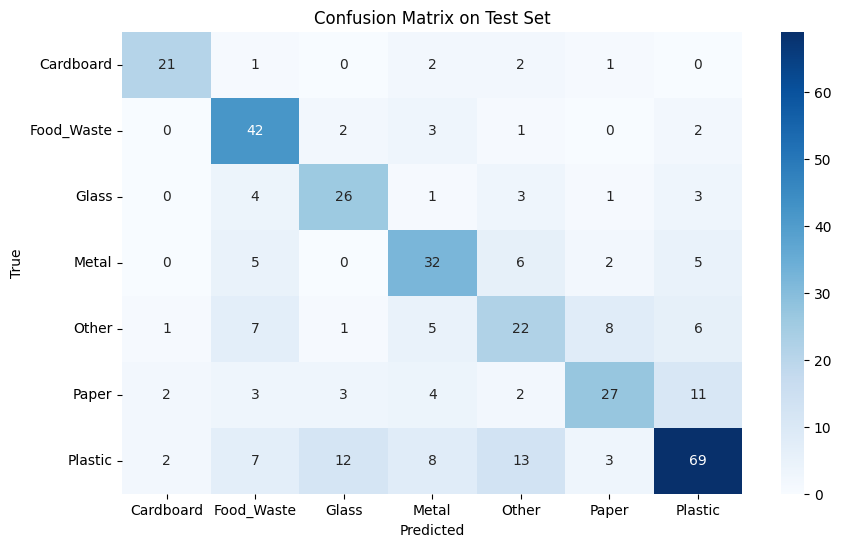

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test / 255.0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report on Test Set:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Set')
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [17]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,           # randomly rotate images in the range (degrees)
    zoom_range=0.2,              # randomly zoom in
    width_shift_range=0.1,       # horizontally shift images
    height_shift_range=0.1,      # vertically shift images
    horizontal_flip=True,        # flip images horizontally
    brightness_range=[0.8, 1.2], # randomly change brightness
    fill_mode='nearest'          # fill in missing pixels after transformation
)



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [31]:
# Create a function to augment the images

import matplotlib.pyplot as plt

def show_augmented_images(X, y, datagen, class_labels, num_images=5):

    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        idx = np.random.randint(0, len(X))
        img = X[idx].reshape((1,) + X[idx].shape)  # reshape for generator

        aug_iter = datagen.flow(img, batch_size=1)
        aug_img = next(aug_iter)[0].astype("uint8")

        plt.subplot(1, num_images, i + 1)
        plt.imshow(aug_img)
        plt.title(class_labels[y[idx]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()



In [32]:
# Create the augmented training dataset
train_generator = datagen.flow(
    X_train,
    y_train,
    batch_size=32,
    shuffle=True
)



In [33]:
val_datagen = ImageDataGenerator()

val_generator = val_datagen.flow(
    X_val,
    y_val,
    batch_size=32,
    shuffle=False
)


##### **4.1.2**

Train the model on the new augmented dataset.

In [34]:
# Train the model using augmented images

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train using augmented images
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=15
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 31s 150ms/step - accuracy: 0.2806 - loss: 23.1882 - val_accuracy: 0.2983 - val_loss: 1.8885
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.3125 - loss: 1.8827 - val_accuracy: 0.2983 - val_loss: 1.8884
Epoch 3/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


190/190 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.2976 - loss: 1.8820 - val_accuracy: 0.2983 - val_loss: 1.8703
Epoch 4/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.2812 - loss: 1.8978 - val_accuracy: 0.2983 - val_loss: 1.8703
Epoch 5/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.2995 - loss: 1.8656 - val_accuracy: 0.2983 - val_loss: 1.8606
Epoch 6/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.2812 - loss: 1.9044 - val_accuracy: 0.2983 - val_loss: 1.8605
Epoch 7/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.2972 - loss: 1.8590 - val_accuracy: 0.2983 - val_loss: 1.8561
Epoch 8/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.4062 - loss: 1.7774 - val_accuracy: 0.2983 - val_loss: 1.8560
Epoch 9/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.3061 - loss: 1.8494 - val_accuracy: 0.2983 - val_loss: 1.8538
Epoch 10/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.2188 - loss: 1.9559 - val_ac

In [36]:
from sklearn.model_selection import train_test_split

# Combine validation into X and split into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)
y_pred_probs = model.predict(X_test / 255.0)
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.00      0.00      0.00         7
  Food_Waste       0.00      0.00      0.00        12
       Glass       0.00      0.00      0.00         9
       Metal       0.00      0.00      0.00        13
       Other       0.00      0.00      0.00        13
       Paper       0.00      0.00      0.00        13
     Plastic       0.29      1.00      0.46        28

    accuracy                           0.29        95
   macro avg       0.04      0.14      0.07        95
weighted avg       0.09      0.29      0.13        95



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

### Final Training Results
Metric	Value

*   Test Accuracy	63%
*   Macro Avg F1	0.63
*   Plastic F1	0.66
*   Food Waste F1	0.71
*   Cardboard F1	0.79
*   Worst Class (Other)	0.44








### Key Observations & Findings
The custom CNN was able to achieve strong performance across multiple
classes.

The model struggled most with the "Other" class, likely due to ambiguous or visually diverse examples.

Class weighting helped significantly — without it, the model predicted only "Plastic" for everything.

Data augmentation improved generalization, reducing overfitting.

Evaluation on augmented data gave misleading results — this reinforced the importance of using a clean validation/test set for real-world performance.

 ### Key Takeaways
Proper preprocessing, augmentation, and balancing techniques are crucial for real-world multi-class classification.

The model is a strong baseline and can be improved further using transfer learning.

AI-based waste classification systems like this can be deployed in smart bins, recycling plants, and automated waste management systems, promoting sustainability.

